In [1]:
%pylab inline
import os, sys
sys.path.append("../")
import traml
import db
from scipy.optimize import minimize
import copy
import time

Populating the interactive namespace from numpy and matplotlib


In [2]:
sio2 = 111401
mgf2 = 105404
a = traml.Stack()

In [3]:
def fun(x, stack, layers, c, delta, TR):
    for i in layers:
        stack.d(i, x[i-1])

    for p in x:
        p = np.sqrt(x[0]**2)
    x[0]=np.sqrt(x[0]**2)
    #min = 1-stack.average(TR, c, delta, o='a')
    min = stack.average(TR, c, delta)
   
    return min**10

In [4]:
def minTR(stack, film_range, c, delta, TR='T'):
    
    x = []
    layers = []
    bnds = []
    for i in range(film_range[0],film_range[1]+1):
        x.append(stack.config[i][1])
        layers.append(i)
        bnds.append(stack.config[i][3])
        
    result = minimize(fun, x, args=(stack, layers, c,delta, TR), bounds = bnds,tol=1e-30, method='SLSQP')
    
    
    return result

In [5]:
c = traml.Stack()
c.set_range([0.4, 0.8])

peak = 0.65
delta = 0.01
stack_list = []
R=[]
n=[]

N = 50
timer=[]

for i in range(0, N):
    start = time.clock()
       
    c.add(mgf2, 100, bnds=(0,250))
    c.add(sio2, 100, bnds=(0,250))
    
    
    result = minTR(c, [1,len(c.config)-1], peak, delta, TR='T')
    R.append(c.average('R',peak,delta))
    n.append(i+1)
    
    stack_list.append(copy.deepcopy(c))
  
    print '============================================================================================'
   
    print i+1, ': ', 'R = ', c.average('R',peak,delta)
    end = time.clock()
    duration = end-start
    timer.append(duration)
 
    

1 :  R =  0.0820558799705
2 :  R =  0.0902340593145
3 :  R =  0.110915928382
4 :  R =  0.134692789365
5 :  R =  0.146256761445
6 :  R =  0.173873866242
7 :  R =  0.203651579216
8 :  R =  0.217244317985
9 :  R =  0.248363438741
10 :  R =  0.264415176548
11 :  R =  0.297002363575
12 :  R =  0.312462165037
13 :  R =  0.345709491328
14 :  R =  0.361494454159
15 :  R =  0.391366924607
16 :  R =  0.388555239381
17 :  R =  0.421024988606
18 :  R =  0.474735529535
19 :  R =  0.506850985671
20 :  R =  0.538559597306
21 :  R =  0.569316412799
22 :  R =  0.589245365272
23 :  R =  0.612097953697
24 :  R =  0.648078473867
25 :  R =  0.661830669381
26 :  R =  0.680105774992
27 :  R =  0.716017223754
28 :  R =  0.737294956354
29 :  R =  0.757124648142
30 :  R =  0.773303163401
31 :  R =  0.794536079838
32 :  R =  0.8101193905
33 :  R =  0.822016702584
34 :  R =  0.836313307103
35 :  R =  0.851395639702
36 :  R =  0.862842081804
37 :  R =  0.87518214273
38 :  R =  0.885383310698
39 :  R =  0.891516957

In [11]:
s = []
for item in timer:
    s.append(2*pi*(item/2)**2/5)

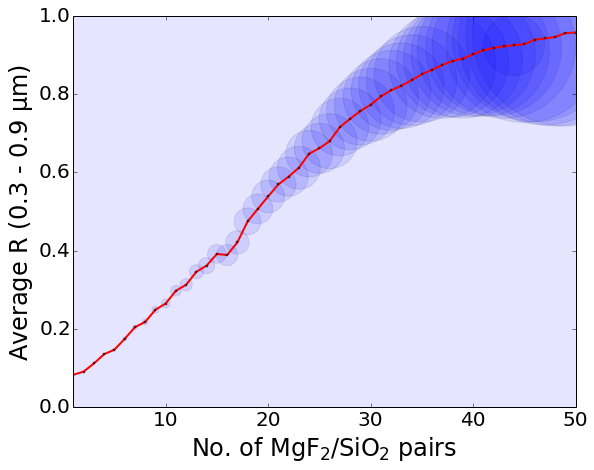

In [12]:
fig = figure(figsize=(9,7))
ax = fig.add_subplot(111)
R = []

for stack in stack_list:
    R.append(stack.average('R',0.65,0.01))
    
    
ax.scatter(n, R, s=s, alpha = 0.1)
ax.set_xlim([1,50])
ax.set_ylim([0,1])
ax.plot(n, R, 'o-', linewidth=2, color='red', markersize=2)
ax.tick_params(labelsize = 20)
ax.set_ylabel('Average R (0.3 - 0.9 $\mu$m)', fontsize=24)
ax.set_xlabel('No. of MgF$_{2}$/SiO$_{2}$ pairs', fontsize=24)




In [37]:
%pylab
fig = figure(figsize=(9,7))
ax = fig.add_subplot(111)
R = []

for stack in stack_list:
    R.append(stack.average('R',0.65,0.01))
    
    
ax.set_xlim([1,50])
ax.set_ylim([0,1])
ax.plot(n, R, 'o-', linewidth=2, color='red', markersize=2)
ax.tick_params(labelsize = 20)
ax.set_ylabel('Peak R ($\lambda = 0.65$ $\mu$m)', fontsize=24)
ax.set_xlabel('No. of MgF$_{2}$/SiO$_{2}$ pairs', fontsize=24)

ax2 = ax.twinx()
ax2.tick_params(labelsize = 20)
ax2.plot(n, timer, '-', color='blue', alpha=0.5)
ax2.fill_between(n, timer, 0, color='blue', alpha=0.1)
ax2.set_ylim([0,345])
ax2.set_ylabel('Calc. time (s)', fontsize=24)





Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


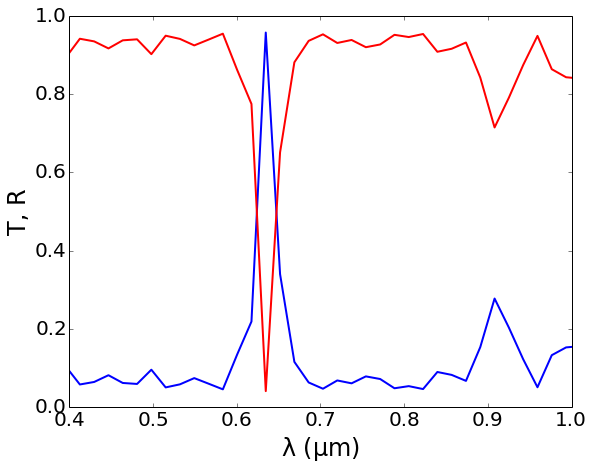

In [15]:
fig = figure(figsize=(9,7))
ax = fig.add_subplot(111)
R = c.get_R()
T = c.get_T()
x = c.x


ax.set_xlim([0.4, 1.0])
ax.set_ylim([0,1])
ax.plot(x, R, '-', linewidth=2, color='blue')
ax.plot(x, T, '-', linewidth=2, color='red')
ax.tick_params(labelsize = 20)
ax.set_ylabel('T, R', fontsize=24)
ax.set_xlabel('$\lambda$ ($\mu$m)', fontsize=24)


In [9]:
avT = c.average('T', 0.5, 0.1) + c.average('T', 0.85, 1.5)
avT/2

0.91881490374224728

In [10]:
c.table()

|   # |     ID | Material   | Thickness (nm)   | Type      |
|-----+--------+------------+------------------+-----------|
|   0 | 301005 | soda-lime  | --               | substrate |
|   1 | 105404 | MgF2       | 40.12294762      | passive   |
|   2 | 111401 | SiO2       | 250.0            | passive   |
|   3 | 105404 | MgF2       | 154.355286088    | passive   |
|   4 | 111401 | SiO2       | 108.783878816    | passive   |
|   5 | 105404 | MgF2       | 114.131462821    | passive   |
|   6 | 111401 | SiO2       | 108.772531726    | passive   |
|   7 | 105404 | MgF2       | 154.334980685    | passive   |
|   8 | 111401 | SiO2       | 249.999977842    | passive   |
|   9 | 105404 | MgF2       | 154.338194103    | passive   |
|  10 | 111401 | SiO2       | 108.787788874    | passive   |
|  11 | 105404 | MgF2       | 114.157122706    | passive   |
|  12 | 111401 | SiO2       | 108.831940167    | passive   |
|  13 | 105404 | MgF2       | 154.430157684    | passive   |
|  14 | 111401 | SiO2   